In [61]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
from IPython.display import Image, display
import matplotlib as mpl
import numpy as np

# Configure global font size settings
mpl.rcParams.update({
    'font.size': 25,  # Default font size for titles, labels, and tick labels
    'axes.labelsize': 25,  # Font size for axis labels
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 20,  # Font size for y-axis tick labels
    'legend.fontsize': 20  # Font size for the legend
})


In [62]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    for i in range(0, len(treefiles)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
#     print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
#     print(df)
    return df

def show_stats_combined(directory):
    fs = glob.glob(f'{directory}*/*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
#     print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df[['text', 'expected_label', 'model_pred', 'id', 'cid', 'vectors']].sort_values(by=['text'])

def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

def show_after_results(directory):
    f = glob.glob(f'{directory}*after_fix_results*')[0]
    df = pd.read_csv(f)
    print(list(df))
    df = df.rename(columns={'model_pred':'new_model_pred', 'vectors':'new_vectors'})
    print(list(df))
    return df[['cid','new_model_pred', 'new_vectors']]

def plot_stuff(df, x, y, xlabel, ylabel, title, yscale=[], xscale=[], yticks=[], xticks=[], ptype='bar'):
    plt.figure(figsize=(8, 6))
    
    # Set the y-axis scale
    dataset_list = list(df['table_name'].unique())
    dataset_list.sort()
    if(ptype=='bar'):
        ax = sns.barplot(data=df, x=x, y=y, hue='table_name', hue_order=dataset_list)
    elif(ptype=='box'):
        ax = sns.boxenplot(data=df, x=x, y=y, hue='table_name', hue_order=dataset_list)
        # Change tick label font size for both x and y axes
    ax.tick_params(axis='both', labelsize=12)
    
    # Add a horizontal line at the specified y-coordinate (line_y)
    if ylabel == 'new_global_accuracy':
#     if line_y is not None:
        ax.axhline(y=float(df['global_accuracy'].unique()[0]), color='red', label='gloabl accuracy before fix',
                  linewidth=5)
        ax.legend(fontsize=14,title_fontsize=15)
        # Create a separate legend for the box plot (customize as needed)
        box_legend = ax.legend(title='Strat',fontsize=13,title_fontsize=15)
    
        # Combine the legends
        ax.add_artist(box_legend)
    else:
        # Create a separate legend for the box plot (customize as needed)
        ax.legend(title='dataset',fontsize=14,title_fontsize=15)
    if yscale:
        ax.set_yscale(yscale)
    
    if xscale:
        ax.set_xscale(xscale)
    
    if yticks:
        ax.set_yticks(yticks)
    
    if xticks:
        ax.set_xticks(xticks)

    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)

    plt.savefig(f"graph_pdfs/scalability_{ptype}_{title}.pdf", format="pdf")
    plt.show()


In [63]:
show_stats('../experiment_results_folders/witan_refinements_2/_20231013063101/')

strat  seed         table_name  rbbm_runtime  bbox_runtime   
0  information_gain   123  painter_architect         0.905        20.884  \

   avg_tree_size_increase  user_input_size  complaint_ratio  num_complaints   
0                     3.4               40              0.5              20  \

   num_confirmations  global_accuracy  fix_rate  confirm_preserve_rate   
0                 20            0.931       0.5                    1.0  \

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions   
0                0.933              10877             10877             10  \

   deletion_factor  post_fix_num_funcs  num_of_funcs_processed_by_algo   
0              0.0                  10                              10  \

   complaint_reached_max  confirm_reached_max  lf_source   
0                  False                False  undefined  \

   retrain_after_percent  retrain_accuracy_thresh  load_funcs_from_pickle   
0                      1                        1                   False  \

   pre_deletion_threshold  
0                     0.0

In [64]:
architect_uinput = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063101/')
architect_results_after_fix = show_after_results('../experiment_results_folders/witan_refinements_2/_20231013063101/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']
['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors']
['old_text', 'expected_label', 'fold', 'cid', 'text', 'new_model_pred', 'new_vectors']


In [65]:
architect_result=pd.merge(left=architect_results_after_fix, right=architect_uinput, how='inner', on='cid')

../experiment_results_folders/witan_refinements_2/_20231013063101/
../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_0_dot_file


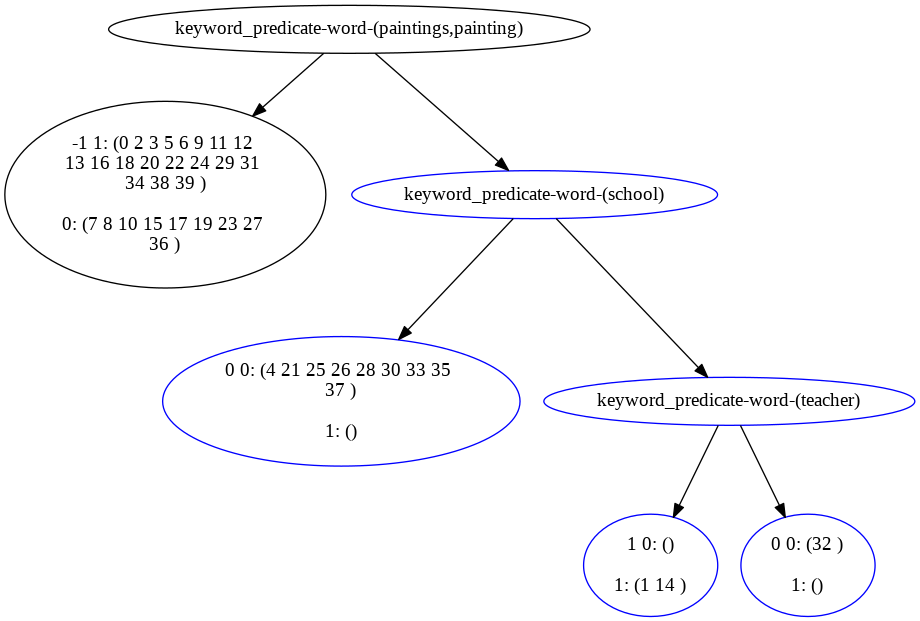



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_1_dot_file


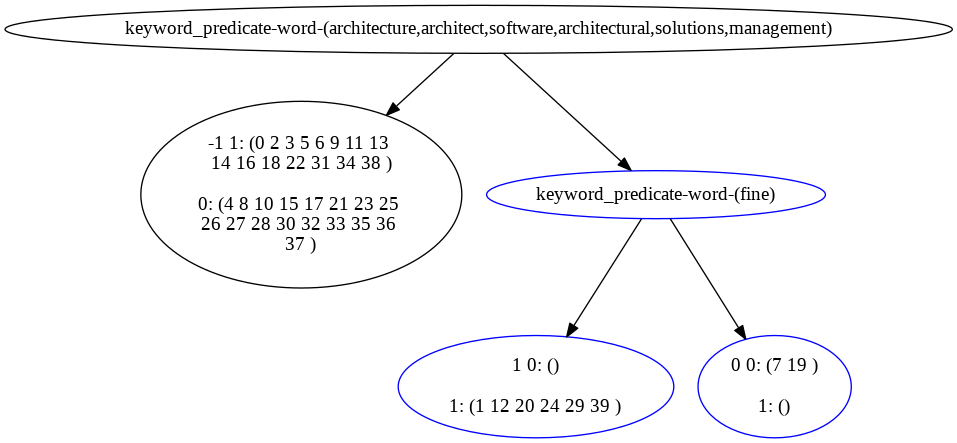



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_2_dot_file


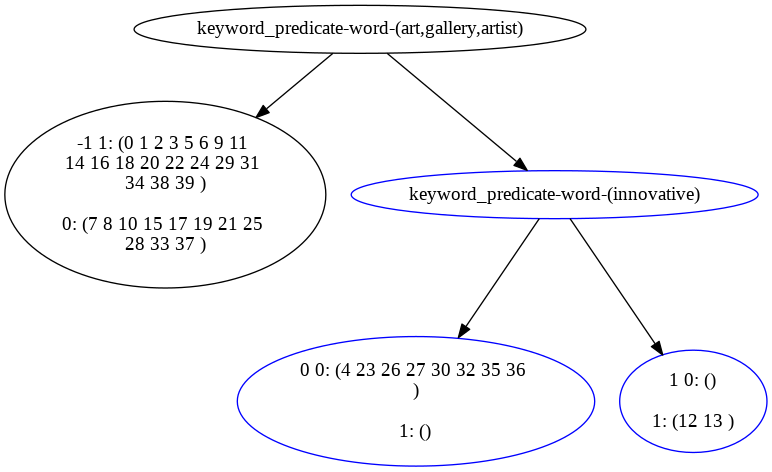



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_3_dot_file


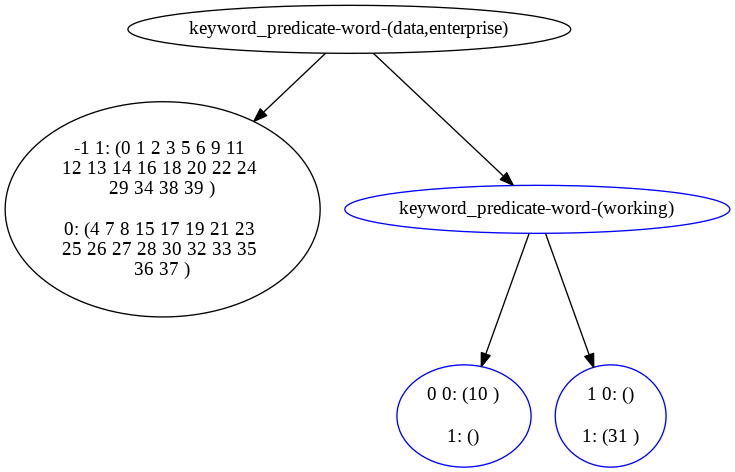



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_4_dot_file


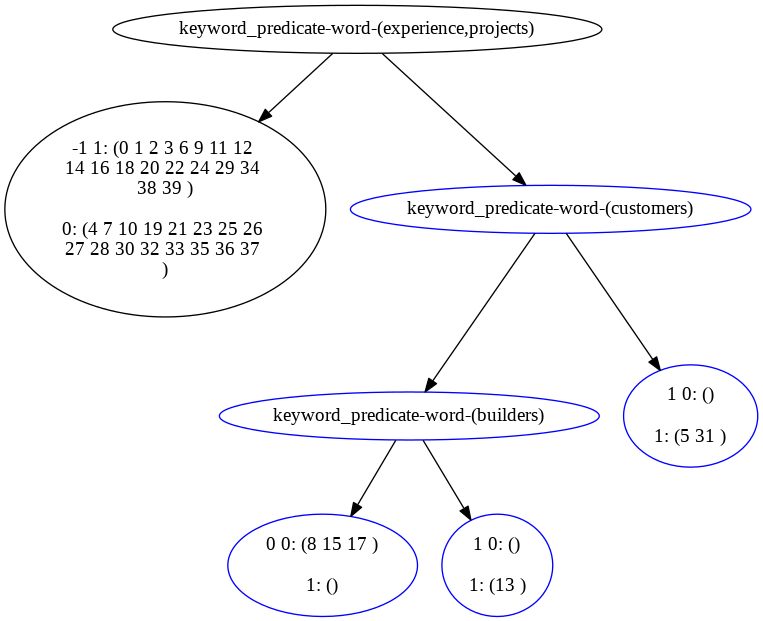



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_5_dot_file


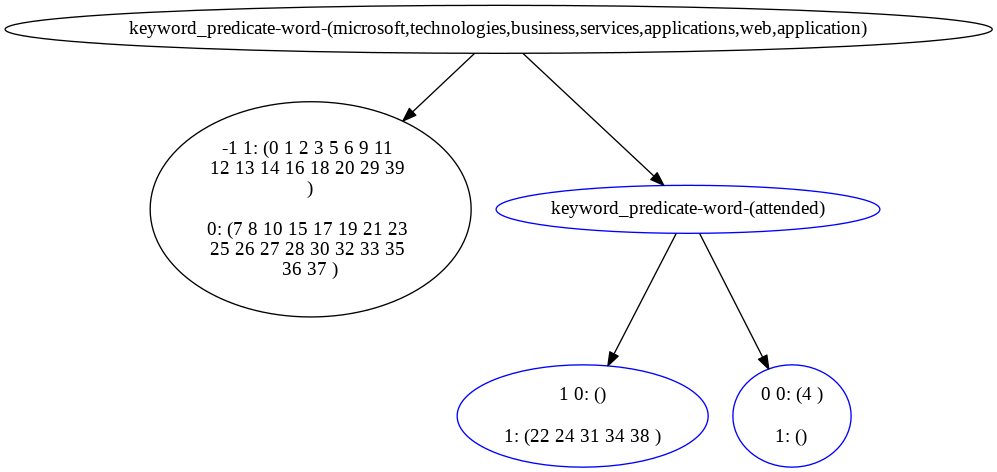



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_6_dot_file


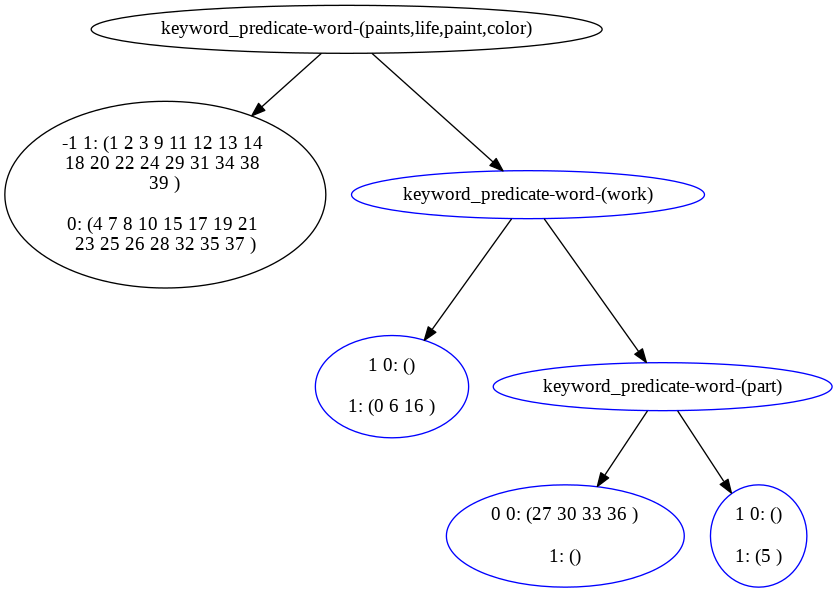



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_7_dot_file


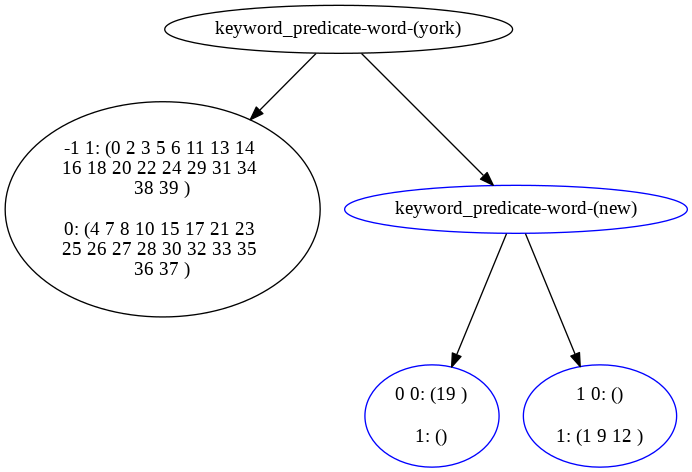



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_8_dot_file


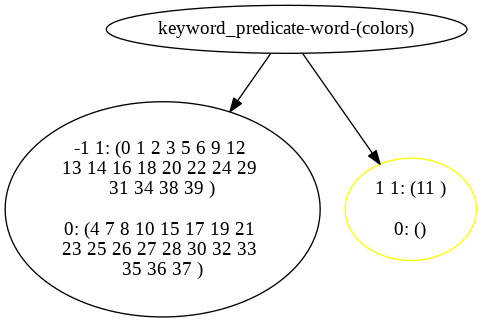



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_9_dot_file


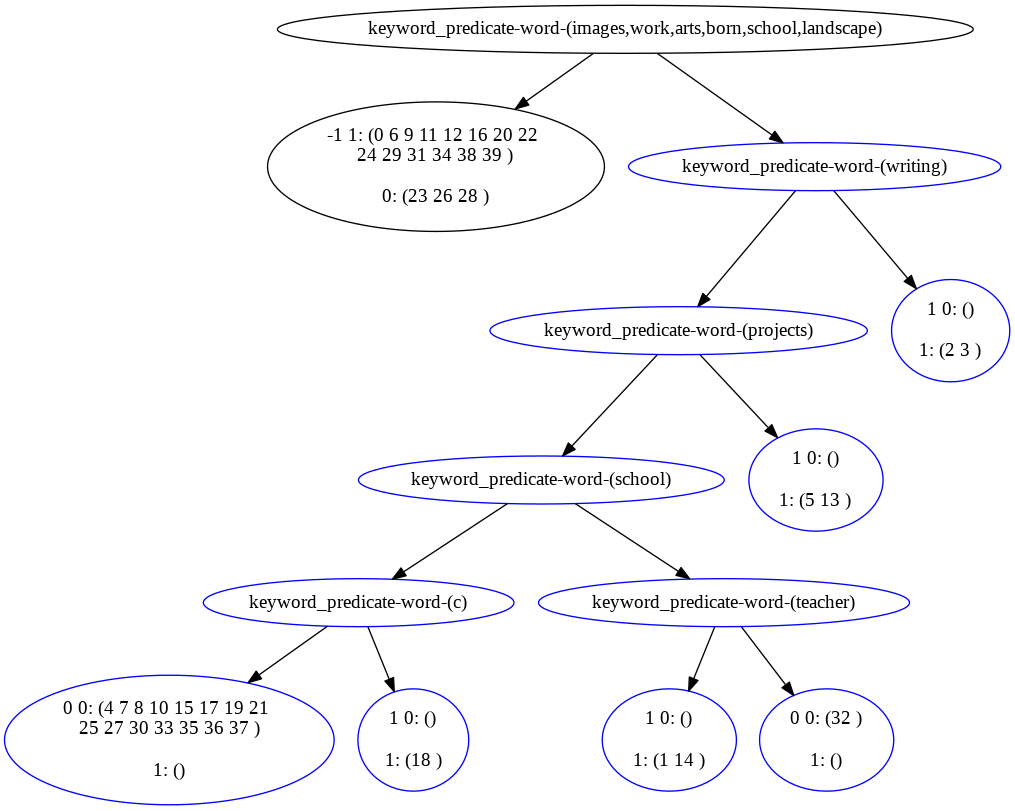

In [66]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063101/')

In [67]:
architect_result[(architect_result['model_pred']!=architect_result['expected_label'])&\
                (architect_result['new_model_pred']==architect_result['expected_label'])]

cid  new_model_pred                   new_vectors   
0     631               1     1,1,-1,-1,-1,-1,-1,1,-1,1  \
6    1949               1  -1,-1,-1,-1,-1,-1,-1,-1,-1,1   
7    2821               1    -1,-1,-1,-1,1,-1,1,-1,-1,1   
9    3146               1    -1,-1,1,-1,1,-1,-1,-1,-1,1   
17   4566               1    -1,1,1,-1,-1,-1,-1,1,-1,-1   
19   4813               1  -1,-1,-1,-1,-1,-1,-1,-1,-1,1   
20   5093               1  -1,-1,-1,-1,-1,-1,-1,-1,-1,1   
24   8551               0   -1,0,-1,-1,-1,-1,-1,-1,-1,0   
25   8645               0    -1,0,-1,-1,-1,-1,-1,0,-1,0   
38  11905               0     0,-1,0,-1,-1,0,-1,-1,-1,0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text   
0                                                                                                                                                                                                                                                                                                                                                                                                                                      after graduating from m arch program at columbia universitys graduate school of architecture  planning and preservation    has worked at various architecture offices in tokyo  shanghai  and new york  besides architecture    is also passionate about photography  pottery and painting   \
6                                                                                                                                                                                                                                                                                                                                                                                                                                                has focused   career on sustainable design and educational design project around the country   s work and writing on sustainability and educational design have been widely published and   design work has received numerous awards    can be reached at rwalker      gmail com    
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               as part of   work   helps customers realize mdsd in real life projects    is one of the core developers on the openarchitectureware project and gives training courses for this product regularly    
9                                                                                                                                         was born into a family of builders and   continued on the tradition of making things as   puts it  by designing some award winning   famous buildings  including the georges pompidou centre in paris  france  the san nicola stadium in bari  italy  the kansai international airport  osaka  japan and the jean marie tjibaou cultural centre in noumea  new caledonia   s work is highl

In [68]:
# architect_result[architect_result['id'].isin([4,21,25,26,28,30,33,35,37,1,14,32])]
architect_result[architect_result['id'].isin([1,14,32])]

cid  new_model_pred                  new_vectors   
0    631               1    1,1,-1,-1,-1,-1,-1,1,-1,1  \
18  4643               0  1,-1,-1,-1,-1,-1,-1,-1,-1,1   
29  9296               0   0,-1,0,-1,-1,-1,-1,-1,-1,0   

                                                                                                                                                                                                                                                                                           text   
0   after graduating from m arch program at columbia universitys graduate school of architecture  planning and preservation    has worked at various architecture offices in tokyo  shanghai  and new york  besides architecture    is also passionate about photography  pottery and painting   \
18                                                                  has studied painting with idelle weber at harvard and andy syrbick at the museum school   in      and        studied drawing with william flynn at the museum school  and has since that time focused primarily on drawing    
29                                                                     is a painting teacher at the school of visual arts in ny    art is seen on album covers  books  and film titles    has had work shown in ny  la  japan and france and of recent  pilots  the fanatic voyage collective     

    expected_label  model_pred  id                      vectors  
0                1           0   1    0,1,-1,-1,-1,-1,-1,0,-1,0  
18               1           0  14  0,-1,-1,-1,-1,-1,-1,-1,-1,0  
29               0           0  32   0,-1,0,-1,-1,-1,-1,-1,-1,0

## Architect spam, painter ham

../experiment_results_folders/witan_refinements_2/_20231013063101/
../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_0_dot_file


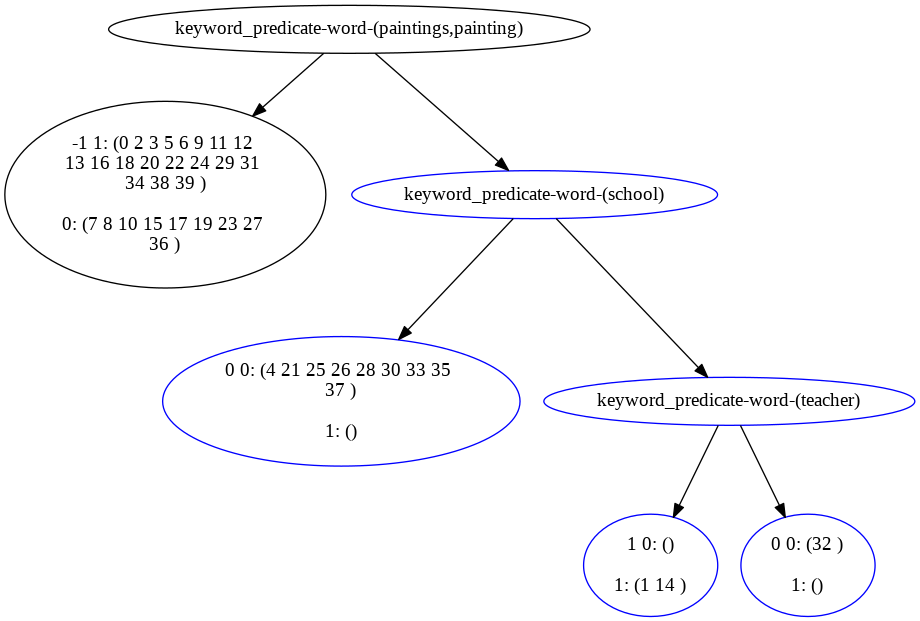



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_1_dot_file


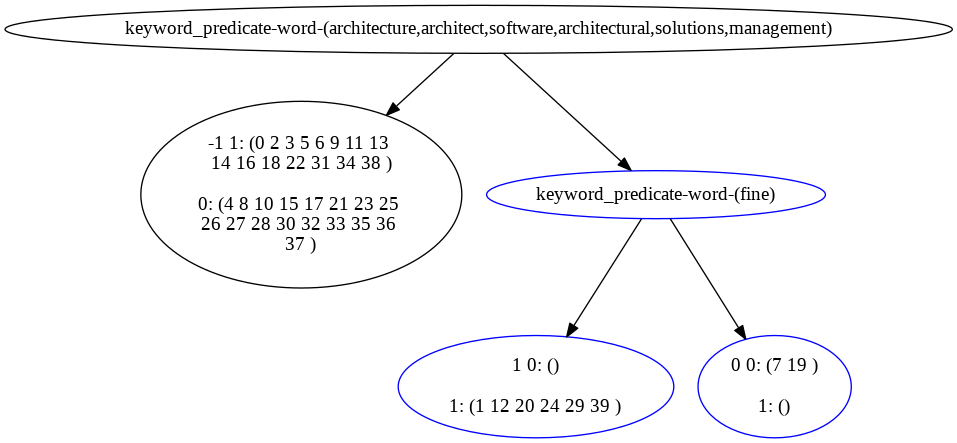



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_2_dot_file


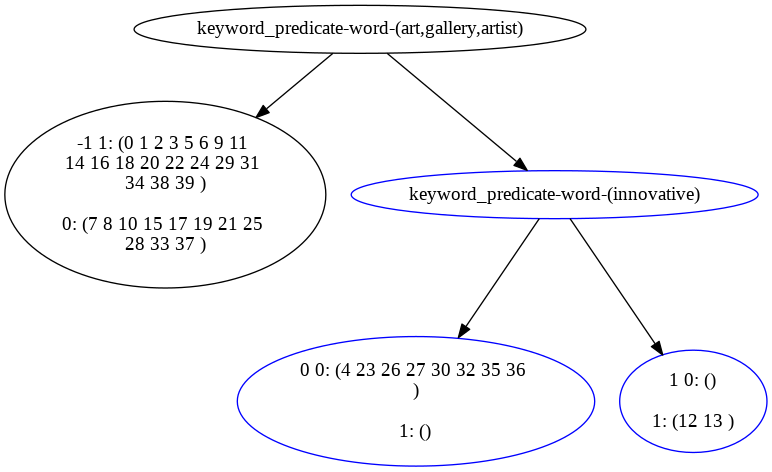



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_3_dot_file


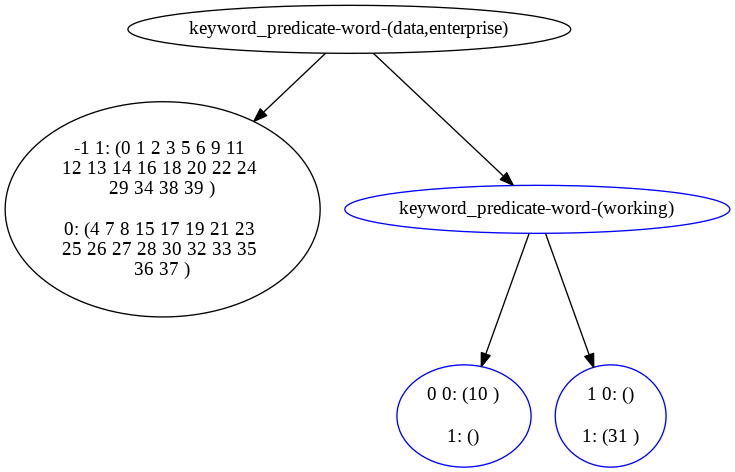



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_4_dot_file


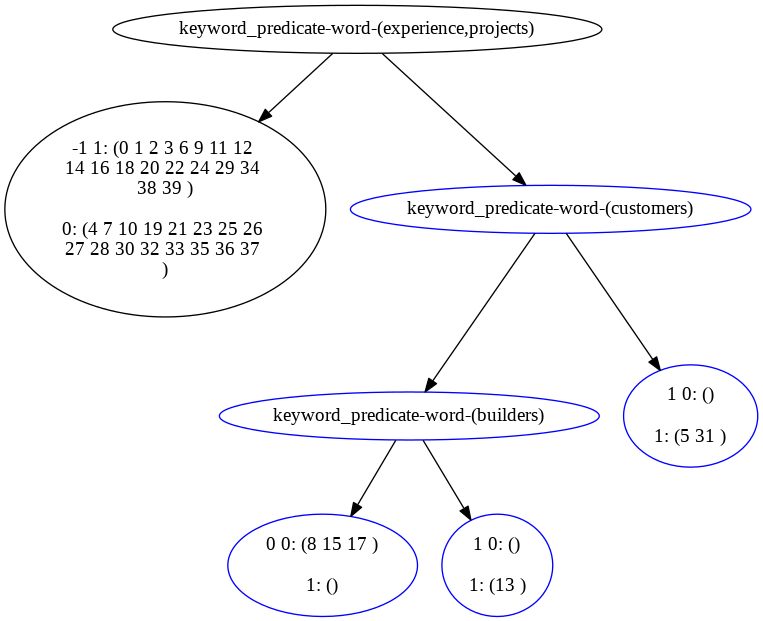



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_5_dot_file


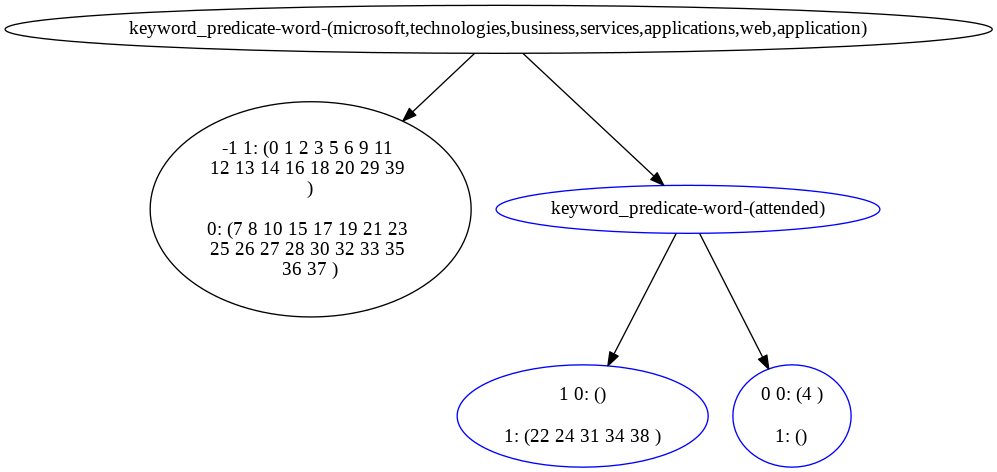



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_6_dot_file


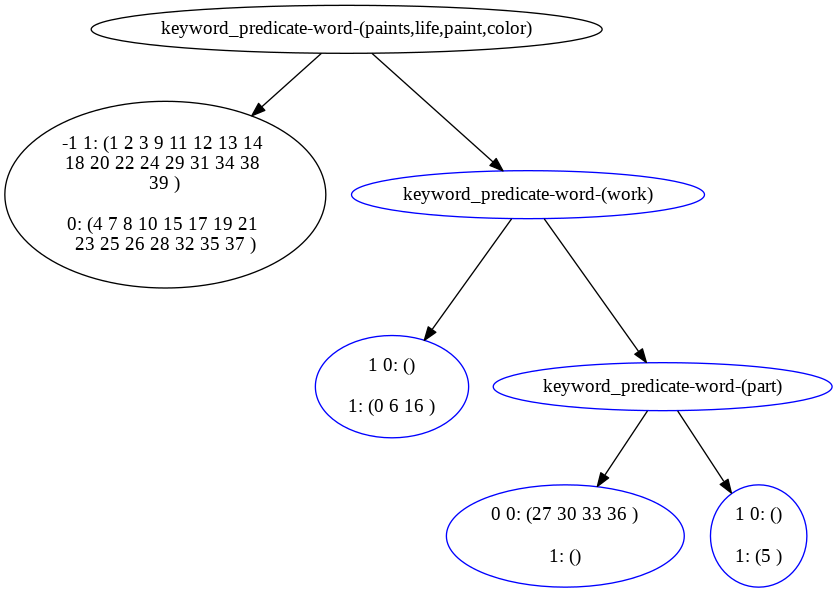



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_7_dot_file


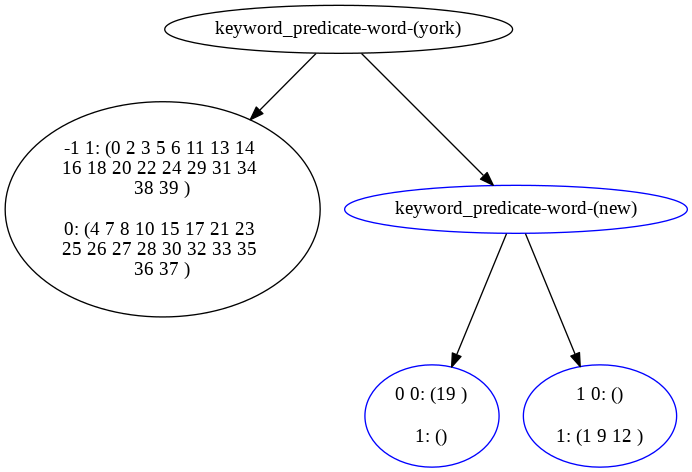



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_8_dot_file


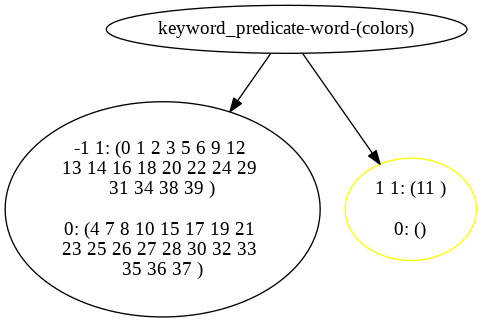



../experiment_results_folders/witan_refinements_2/_20231013063101/20231013063101_tree_information_gain_9_dot_file


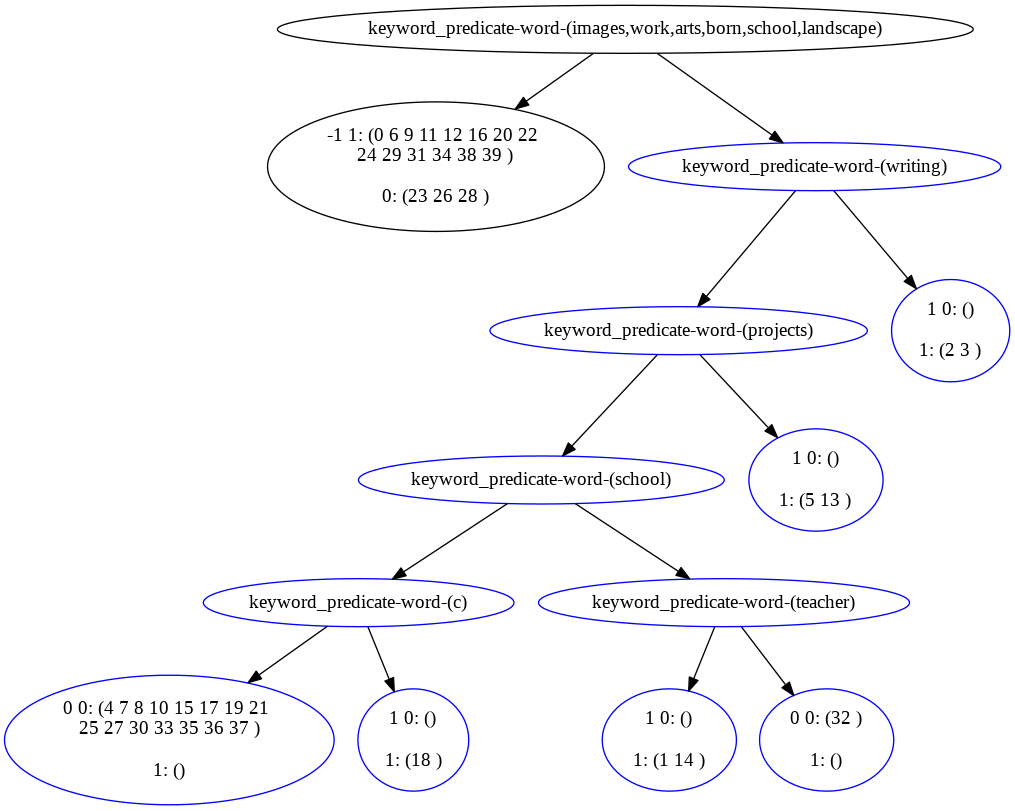

In [69]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063101/')

In [70]:
show_user_inputs('../experiment_results_folders/witan_refinements/_20231013060751/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


text   
4     attended st  cloud state university in minnesota  graduating with   b a  in art in      and   m a  in painting and drawing in         then went on to attend the university of washington in seattle graduating in     with   m f a  in painting and drawing    has received numerous awards from an array of organizations including  minnesota state arts board   ford foundation scholarship  northwest international art competition at the whatcom museum and a residency at the morris graves foundation    work is included in private and public collections across the united states  among them  the microsoft corporation  the boeing corporation  the neiman marcus corporation and swedish hospital of seattle   \
12                                                                                     background includes a wide range from urban mixed use developments to an art museum and a leed platinum residence  whatever the project    helps transform challenges into innovative design solutions    is forward thinking  focusing on where architecture and sustainable design are heading  using technology to promote the most versatile use of energy and materials    is the recipient of numerous honors and awards and has been published in respected publications including  the wall street journal  dwell  mens journal  environmental design and construction  professional builder  and the new york times  among others    
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    develops analytics platforms powered by scala and cassandra  in addition to writing the java language reference    is the author of the forthcoming deisgn patterns course for o reilly school of technology    
25                                                                                                                                                                                                                                                                                                                                                                                      explained the unique features of tibetan thangka painting of the tsangdri tradition in this book by giving the precise instructions and explanation regarding the foundation diagrams  colours etc  of wrathful and peaceful images in accordance with traditional standards of quality  copyright             saujanya books how to order   
19                                                                                                                                                                                                                                                                                                                                              has a fine arts degree from york university    spent much of   childhood growing up amongst the trees  lakes and rocks of northern ontario  utilizing thick textures that are suggestive of reality without being abstract or literal    landscapes in oil reveal   love for the land  while the character   finds in old buildings reveals   love of canada and its architecture    
33                                                                                                                                                                                                                                                                                                                                       has been known for radiant  patterned and delicately worked surfaces comprising bodies and objects in landscapes 

In [71]:
show_stats('../experiment_results_folders/witan_refinements/_20231013060853/')

strat  seed         table_name  rbbm_runtime  bbox_runtime   
0  information_gain   123  professor_teacher         0.773        84.276  \

   avg_tree_size_increase  user_input_size  complaint_ratio  num_complaints   
0                1.333333               40              0.5              20  \

   num_confirmations  global_accuracy  fix_rate  confirm_preserve_rate   
0                 20            0.576      0.95                    0.0  \

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions   
0                0.426               9039              9039             15  \

   deletion_factor  post_fix_num_funcs  num_of_funcs_processed_by_algo   
0              0.0                  15                              15  \

   complaint_reached_max  confirm_reached_max  lf_source   
0                  False                False  undefined  \

   retrain_after_percent  retrain_accuracy_thresh  load_funcs_from_pickle   
0                      1                        1                   False  \

   pre_deletion_threshold  
0                     0.0

## professor spam, teacher ham

In [72]:
professor_inputs = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063133/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [73]:
show_stats('../experiment_results_folders/witan_refinements_2/_20231013063133/')

strat  seed         table_name  rbbm_runtime  bbox_runtime   
0  information_gain   123  professor_teacher           1.1        31.158  \

   avg_tree_size_increase  user_input_size  complaint_ratio  num_complaints   
0                     4.0               40              0.5              20  \

   num_confirmations  global_accuracy  fix_rate  confirm_preserve_rate   
0                 20            0.883      0.45                    1.0  \

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions   
0                 0.88              19627             19627              7  \

   deletion_factor  post_fix_num_funcs  num_of_funcs_processed_by_algo   
0              0.0                   7                               7  \

   complaint_reached_max  confirm_reached_max  lf_source   
0                  False                False  undefined  \

   retrain_after_percent  retrain_accuracy_thresh  load_funcs_from_pickle   
0                      1                        1                   False  \

   pre_deletion_threshold  
0                     0.0

In [74]:
professor_uinput = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063133/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [75]:
professor_results_after_fix = show_after_results('../experiment_results_folders/witan_refinements_2/_20231013063133/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors']
['old_text', 'expected_label', 'fold', 'cid', 'text', 'new_model_pred', 'new_vectors']


In [76]:
professor_result=pd.merge(left=professor_results_after_fix, right=professor_uinput, how='inner', on='cid')
professor_result[(professor_result['model_pred']!=professor_result['expected_label'])&\
                (professor_result['new_model_pred']==professor_result['expected_label'])]

cid  new_model_pred         new_vectors   
7    2464               1  1,1,-1,-1,-1,-1,-1  \
8    2730               1  1,-1,-1,-1,-1,1,-1   
10   2891               1  -1,-1,-1,-1,1,1,-1   
19  11643               0  -1,-1,-1,0,0,-1,-1   
22   9257               1  -1,1,1,-1,-1,-1,-1   
26  13965               0  -1,-1,-1,-1,0,-1,0   
27  14734               0  -1,-1,-1,-1,0,-1,0   
33  18274               0  -1,-1,-1,-1,0,-1,0   
36  20077               0  -1,-1,-1,0,0,-1,-1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text   
7                                                                                                                                                      is also a faculty advisor to the school of business at linton global college  hannam university  rob holds advanced degrees in public administration and law  and has been involved in various aspects of marketing and branding in both korea and the united states  involved in community based organizations for nearly    years    led the branding and marketing research and development aspects for a half dozen groups  most recently   focus has been on improving the status of services to teacher in korea through the organization korea tesol    has resided in korea since         may be reached at rjdickey content english org  \
8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      plans on using   experience to assist ucla administrators in the transition to a smoke free campus  according to    smoking cigarettes not only causes a wide variety of serious health problems but also damages a students overall well being    
10                                                                                                                                                                                                                                                                      obtained   undergraduate degree at the university of wisconsin madison in medical microbiology and immunology    completed   masters of science in physician assistant studies here at rfums    currently practices full time emergency medicine along with   teaching duties    is passionate about healthcare  especially in underserved countries    is one of the co founders of an organization entitled the village medical project  which travels to sierra leone every year to provide free care to remote populations    
19                                                                                                                                                                                                                                                                                                                                                                                                             

In [77]:
list(professor_result[(professor_result['model_pred']!=professor_result['expected_label'])&\
                (professor_result['new_model_pred']==professor_result['expected_label'])]['id'])

[13, 18, 4, 10, 7, 16, 17, 11, 19]

../experiment_results_folders/witan_refinements_2/_20231013063133/
../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_0_dot_file


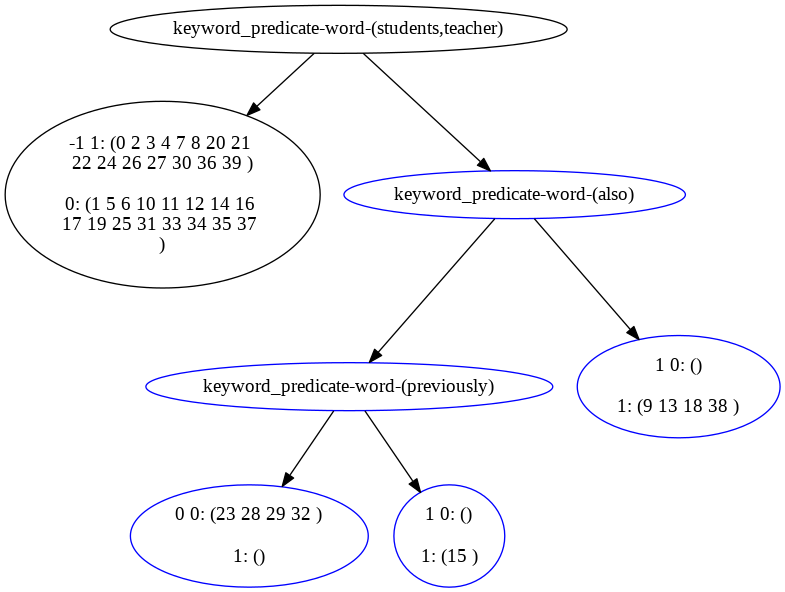



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_1_dot_file


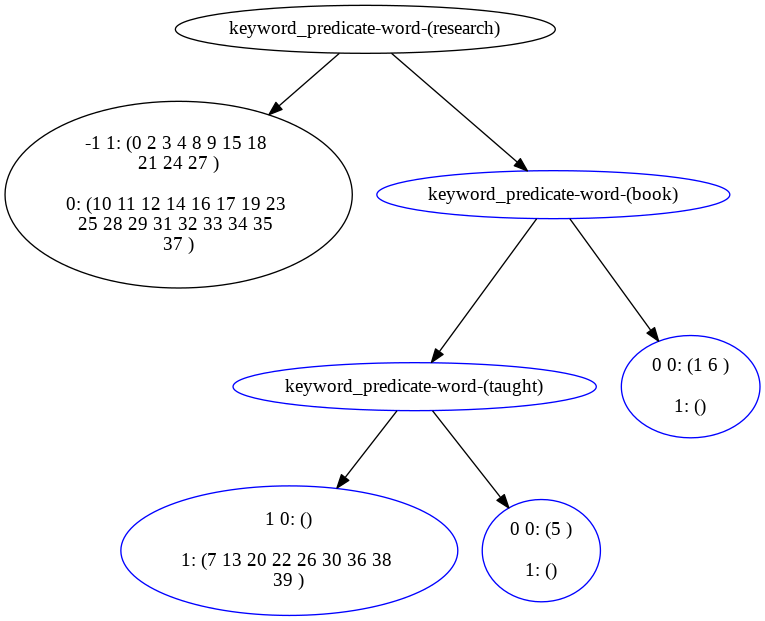



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_2_dot_file


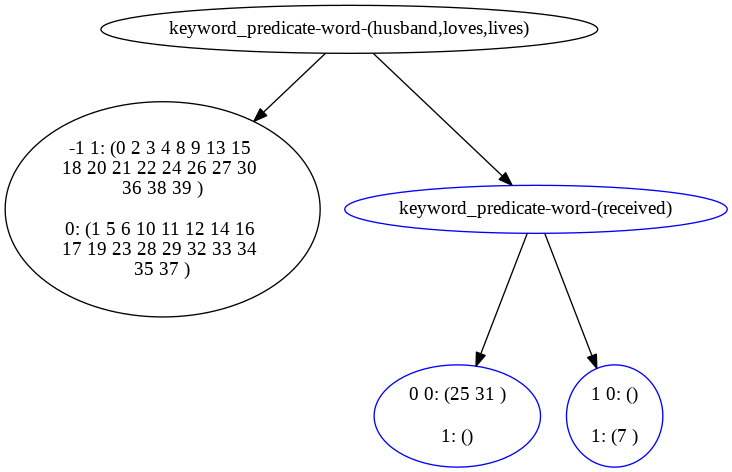



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_3_dot_file


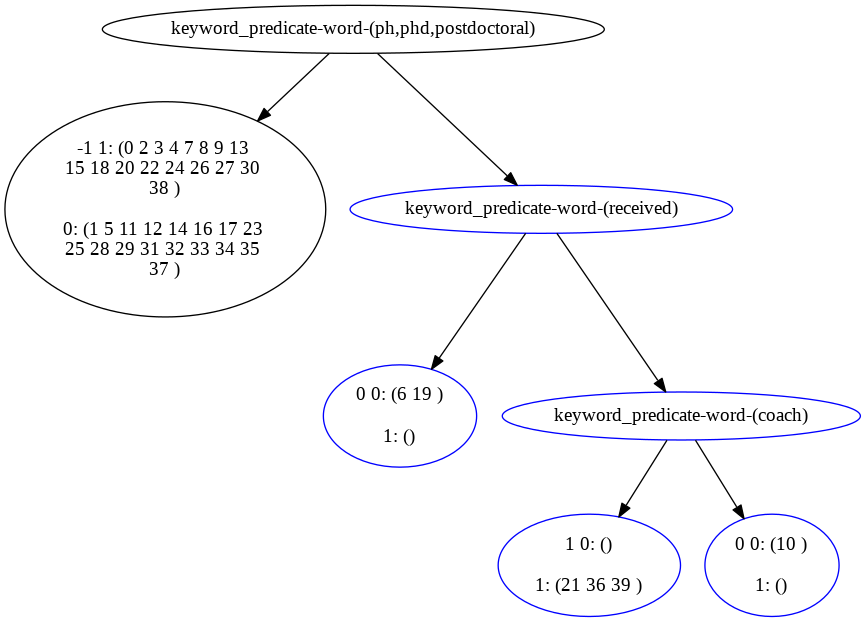



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_4_dot_file


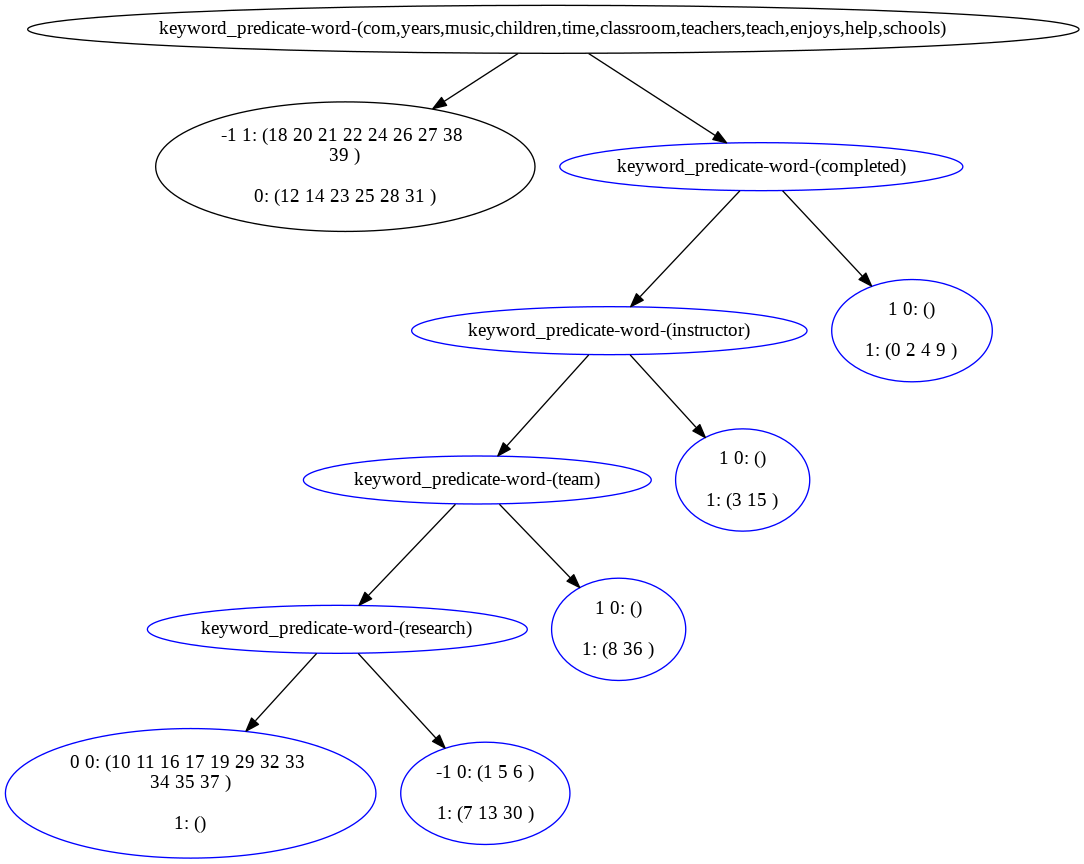



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_5_dot_file


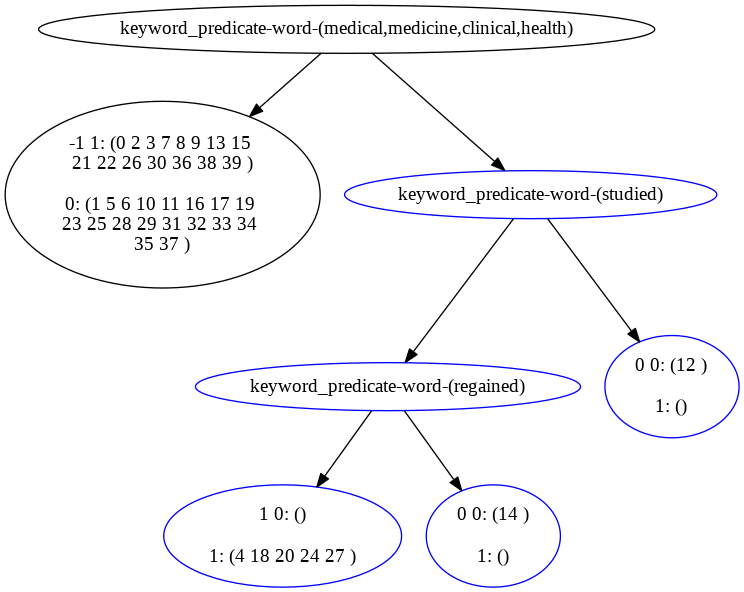



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_6_dot_file


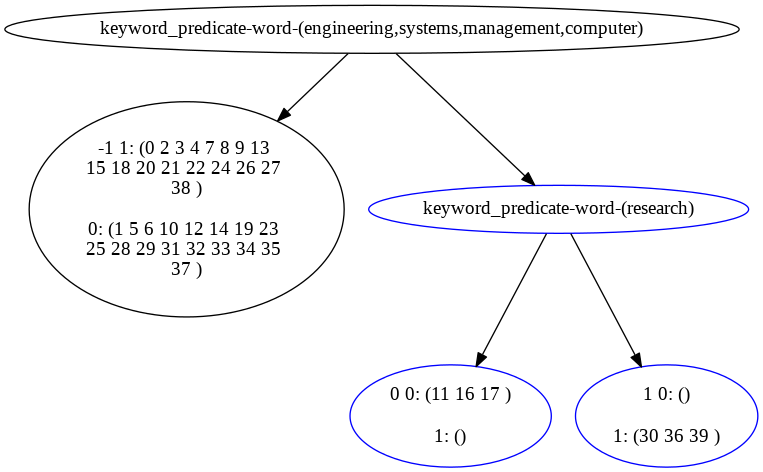

In [78]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063133/')

## amazon positive ham, negative spam

In [79]:
amazon_inputs = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063219/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [80]:
amazon_inputs

text   
9                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          in    just fits everything the      in    fits everything and has worked well for my son  it was a present for him  he loves it i would endorse it  trust me if my son likes it its great  \
29                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 pound gentle dog destroyed this is    minutes of pretty tame play lasted    minutes  this is made out of a cheap material and my    pound shih tzu destroyed it in    minutes  and she is usually pretty gentle with her toys  the top and bottom halves screw together and easily just pull apart  i would not recommend this  it may become unsafe if plastic parts are broken off and ingested   
38                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             a total and utter sham and fabrication  antichristian this new age frauds series of books are full of lies and fabrications claiming to be the voice of god  this book claims that god suggests that value less moral relativism no good or evilis the path to a new world order which denies the truth of love and christianity and the absolute power of god  these books vols     are the most damaging attempt by an anti christian to undermine the truth of jesus christ  dont believe a word of it  im writing a book called the practical guide to real christianity which will dispel the lies and fabrications of the shameful author of this pathetic attempt at deception   
6                               

../experiment_results_folders/witan_refinements_2/_20231013063219/
../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_0_dot_file


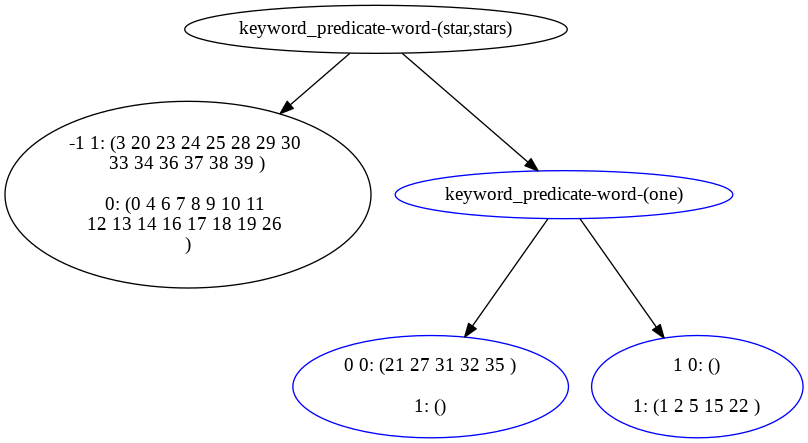



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_1_dot_file


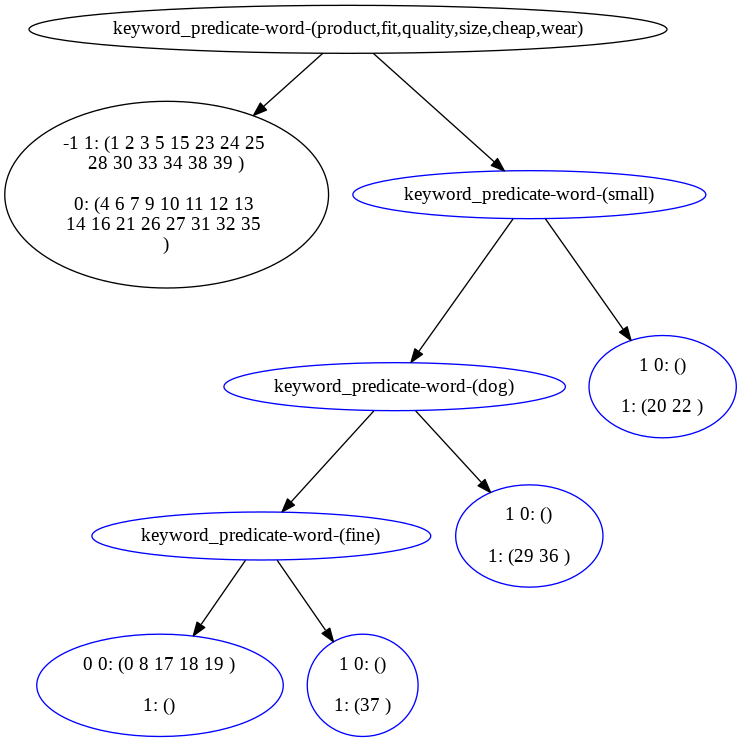



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_10_dot_file


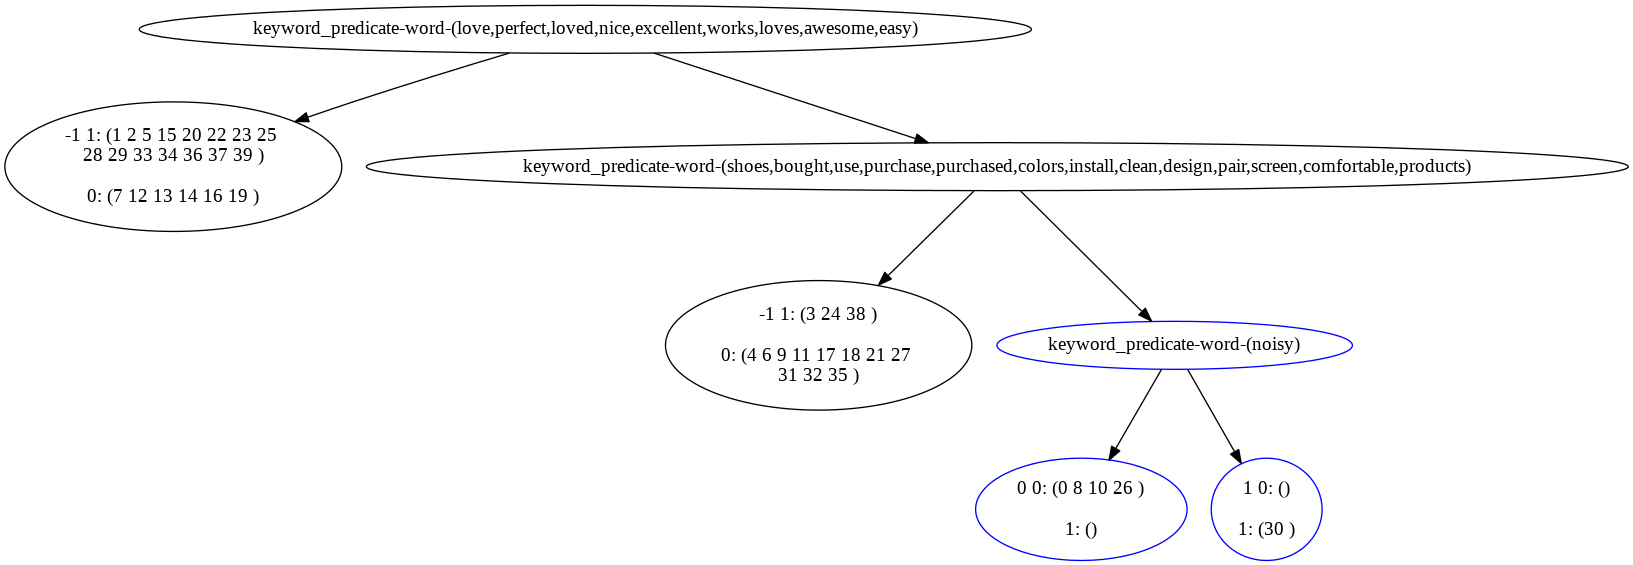



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_11_dot_file


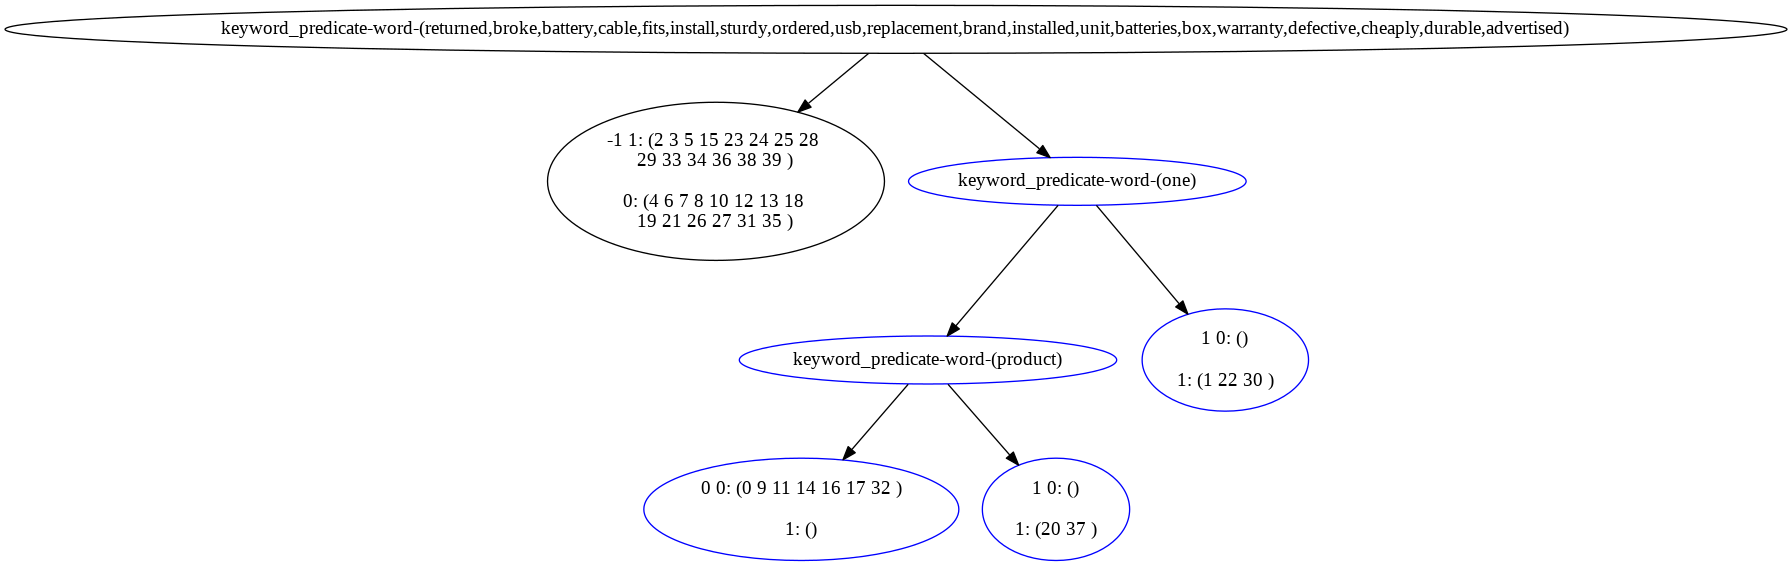



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_12_dot_file


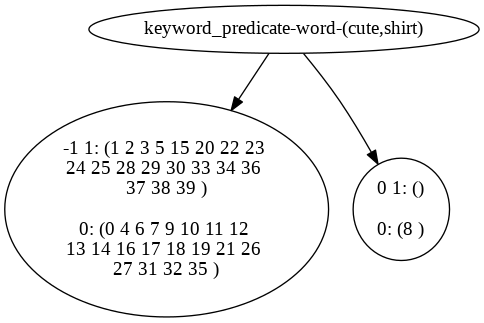



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_13_dot_file


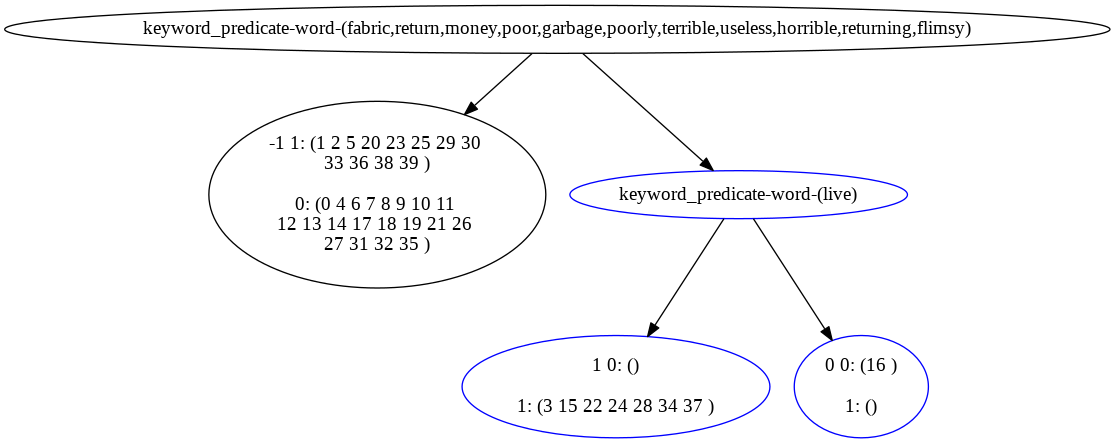



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_14_dot_file


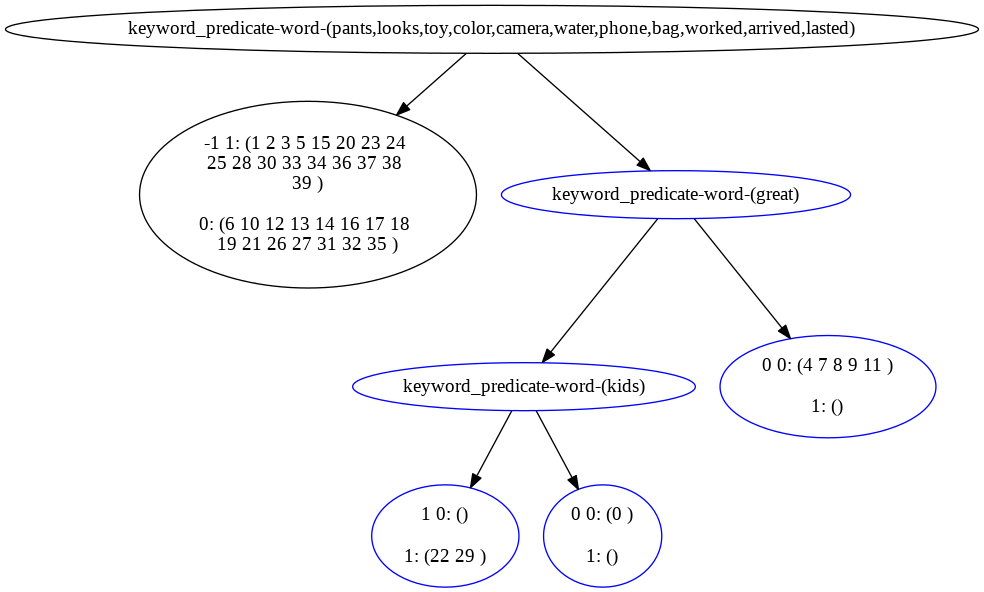



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_2_dot_file


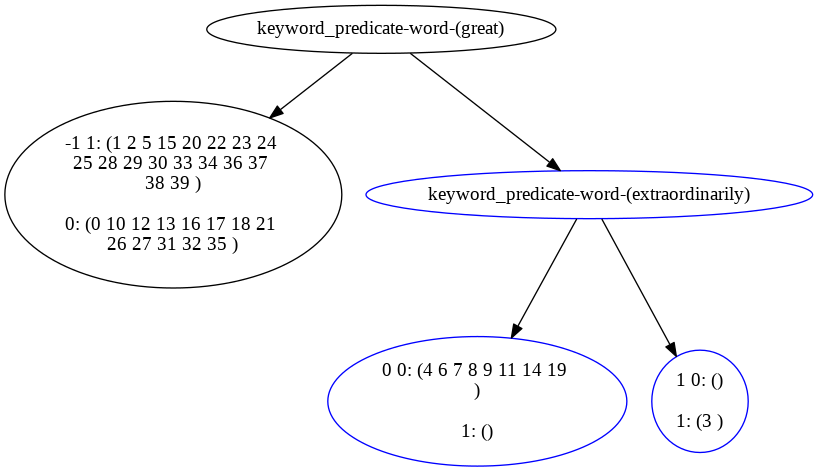



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_3_dot_file


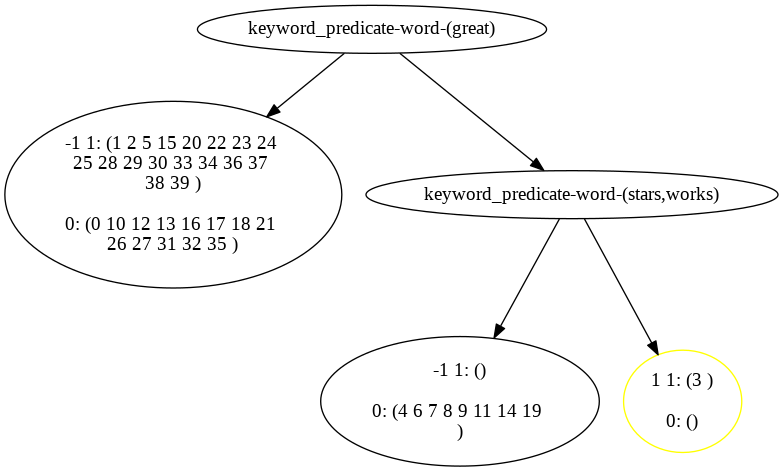



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_4_dot_file


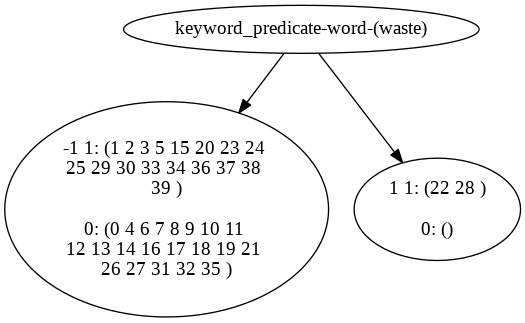



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_5_dot_file


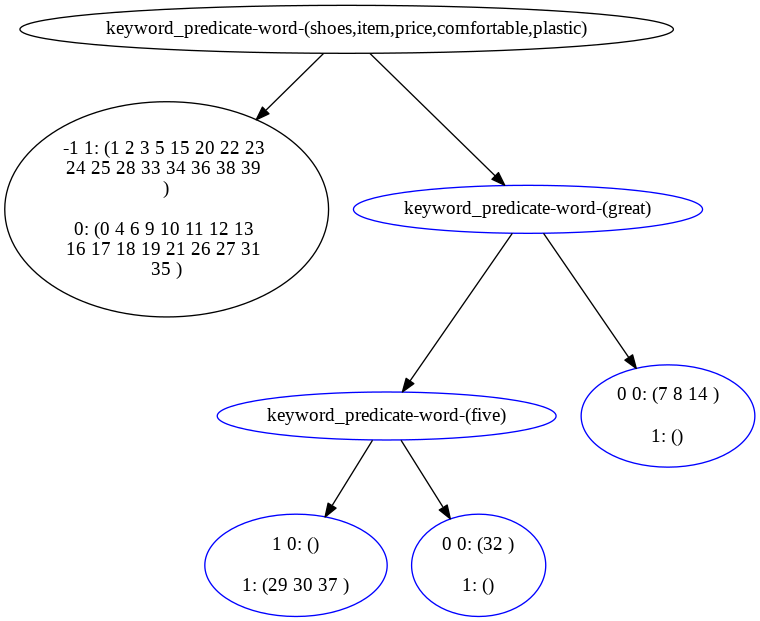



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_6_dot_file


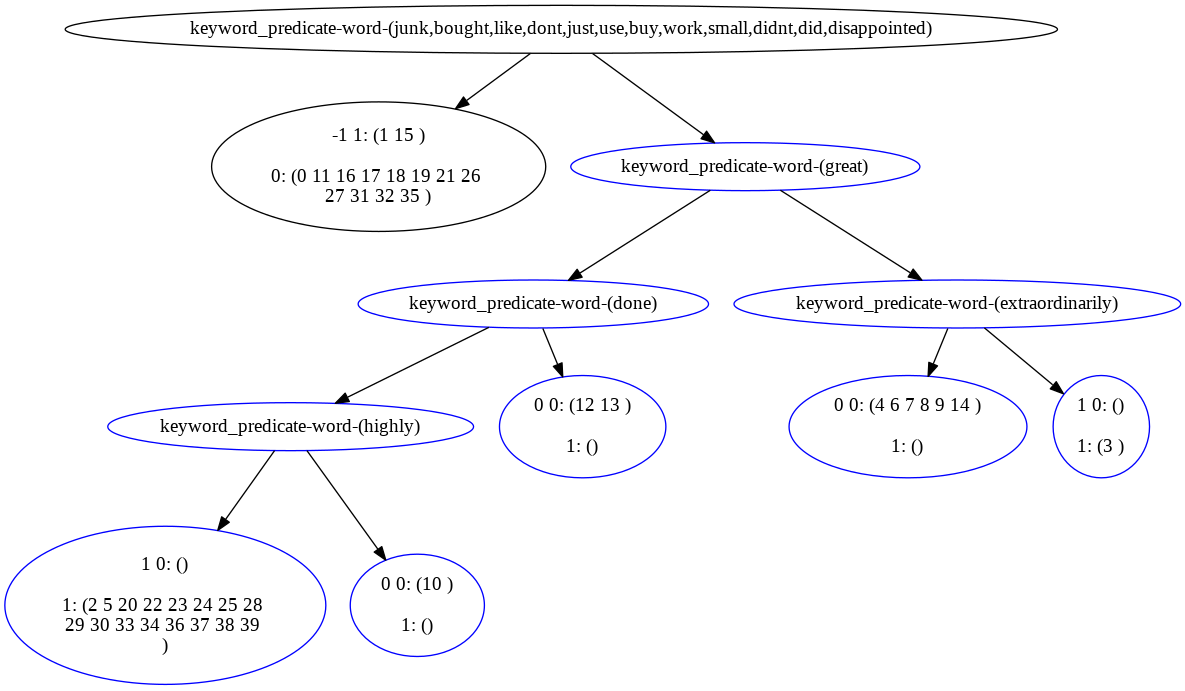



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_7_dot_file


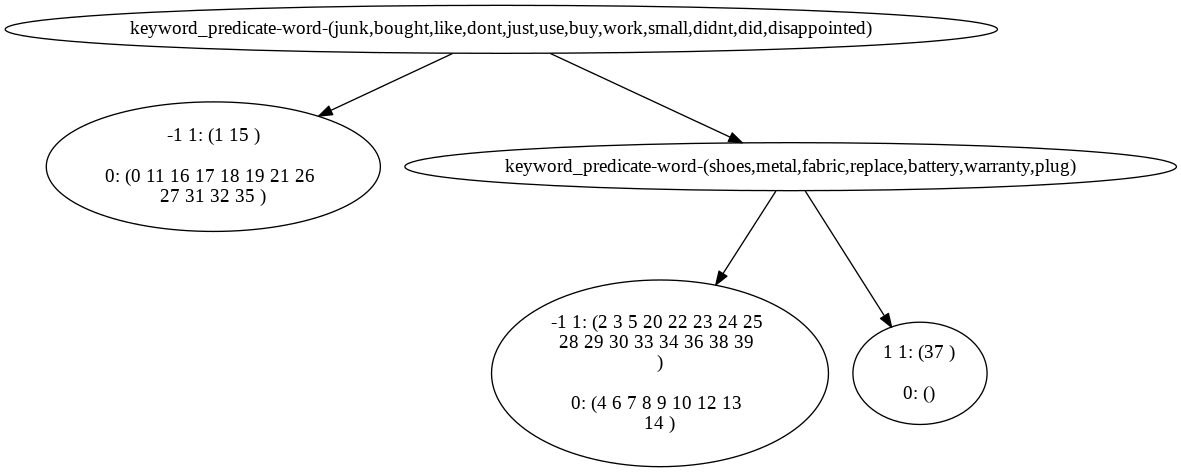



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_8_dot_file


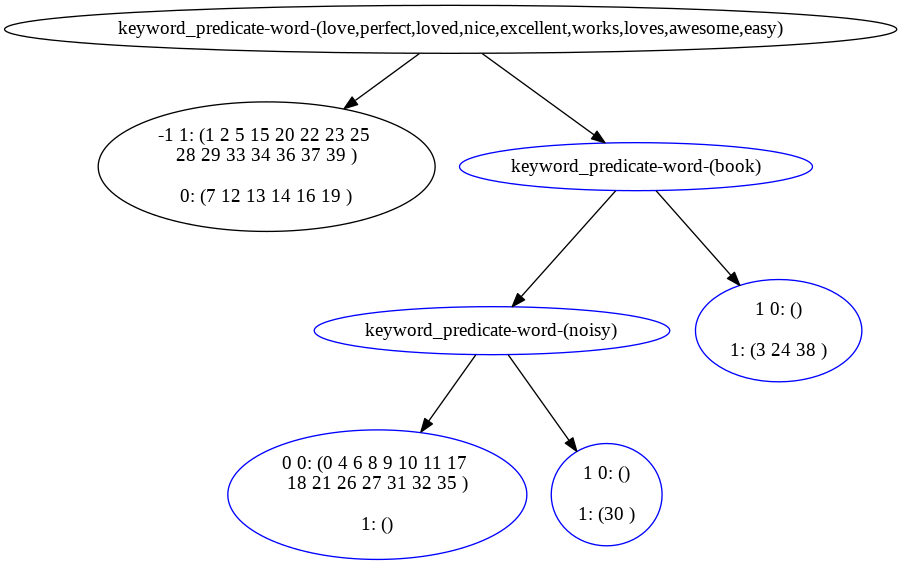



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_9_dot_file


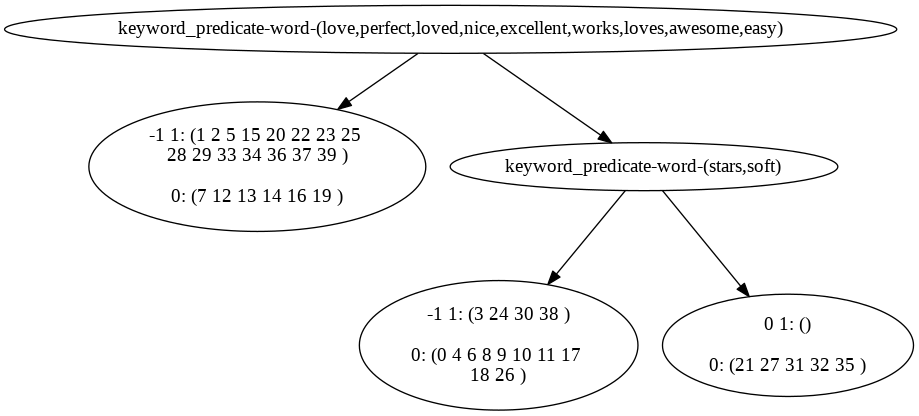



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_10_dot_file


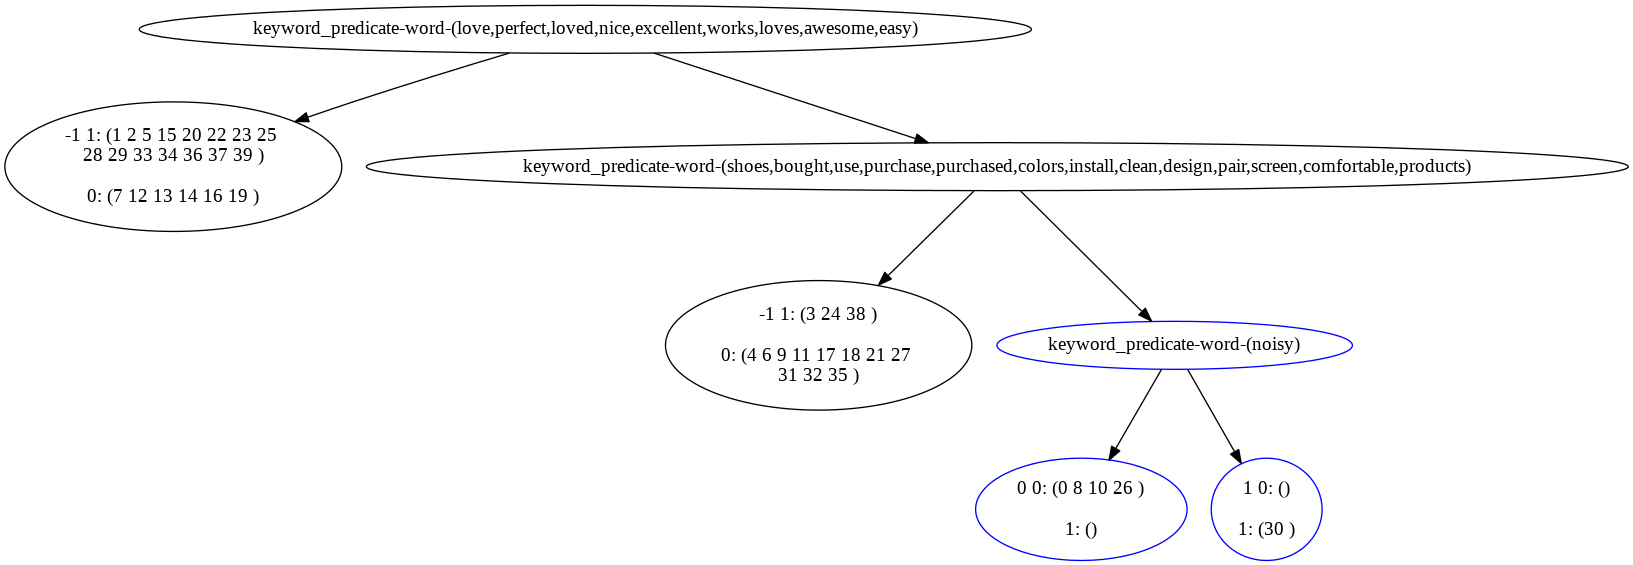



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_11_dot_file


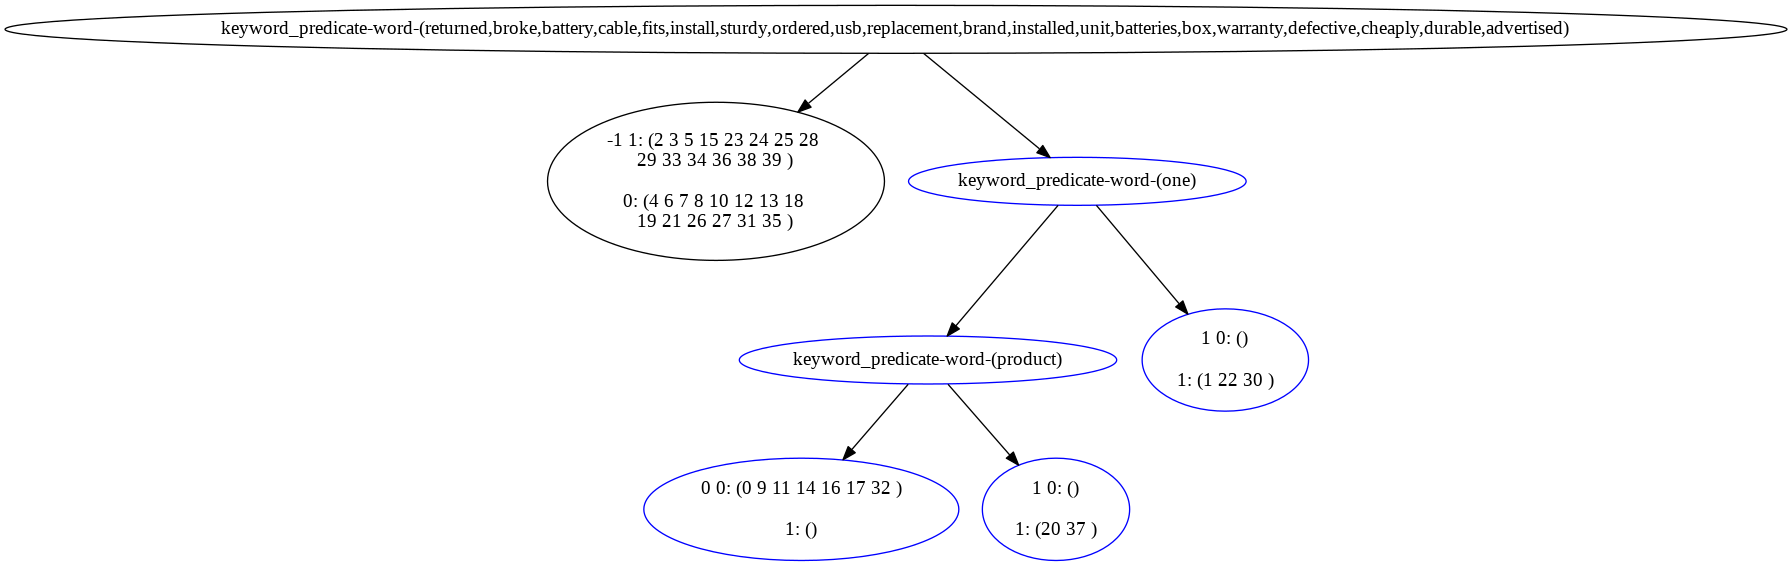



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_12_dot_file


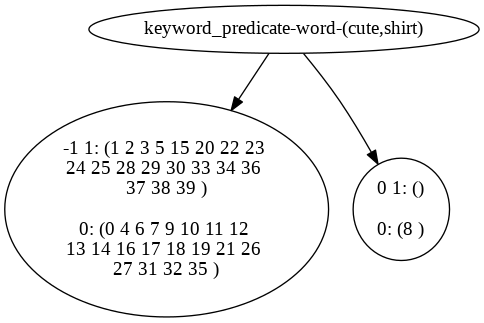



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_13_dot_file


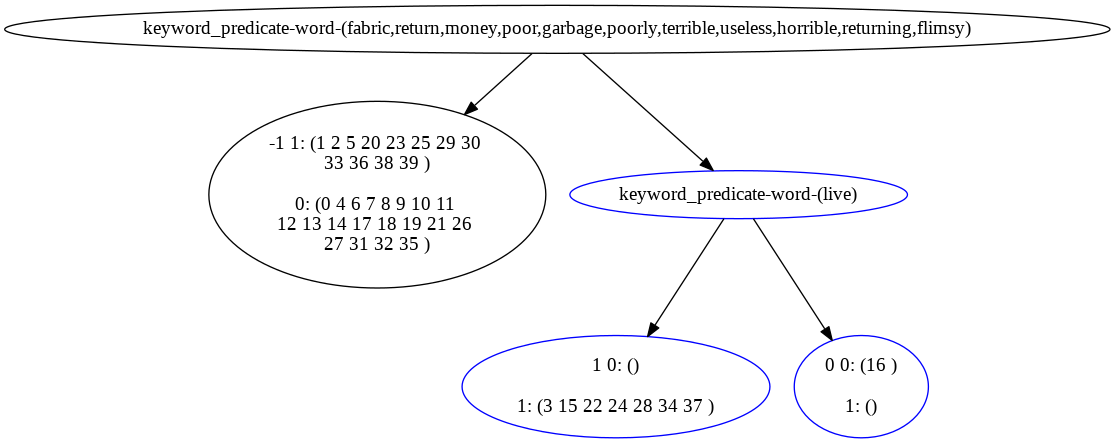



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_14_dot_file


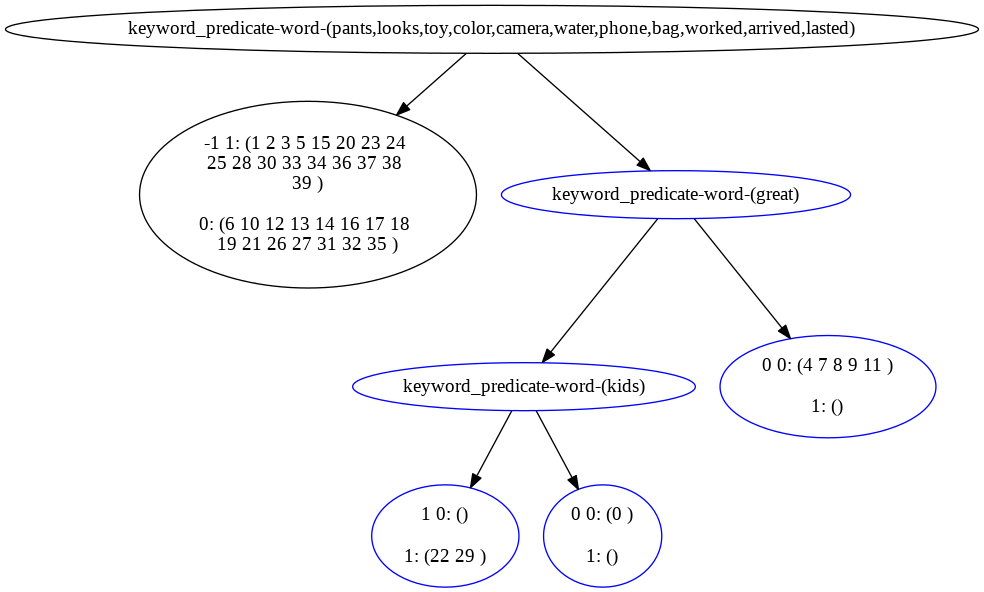

In [81]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063219/')

In [82]:
show_stats('../experiment_results_folders/witan_refinements_2/_20231013063219/')

strat  seed table_name  rbbm_runtime  bbox_runtime   
0  information_gain   123     amazon         2.474       916.581  \

   avg_tree_size_increase  user_input_size  complaint_ratio  num_complaints   
0                2.666667               40              0.5              20  \

   num_confirmations  global_accuracy  fix_rate  confirm_preserve_rate   
0                 20            0.643      0.95                    1.0  \

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions   
0                0.783             184548            184548             15  \

   deletion_factor  post_fix_num_funcs  num_of_funcs_processed_by_algo   
0              0.0                  15                              15  \

   complaint_reached_max  confirm_reached_max  lf_source   
0                  False                False  undefined  \

   retrain_after_percent  retrain_accuracy_thresh  load_funcs_from_pickle   
0                      1                        1                   False  \

   pre_deletion_threshold  
0                     0.0

In [83]:
df = show_stats_combined('../experiment_results_folders/witan_refinements_2/')

In [84]:
df.loc[df['table_name'] == 'painter_architect', 'table_name'] = 'PA'
df.loc[df['table_name'] == 'professor_teacher', 'table_name'] = 'PT'


In [85]:
df

strat  seed table_name  rbbm_runtime  bbox_runtime   
0  information_gain   123         PA         0.905        20.884  \
0  information_gain   123         PT         1.100        31.158   
0  information_gain   123     amazon         2.474       916.581   
0  information_gain   123         PA         8.940        21.933   
0  information_gain   123         PT         5.543        32.740   
0  information_gain   123     amazon         5.543      1088.759   

   avg_tree_size_increase  user_input_size  complaint_ratio  num_complaints   
0                3.400000               40              0.5              20  \
0                4.000000               40              0.5              20   
0                2.666667               40              0.5              20   
0                7.000000               80              0.5              40   
0                7.714286               80              0.5              40   
0                3.866667               80              0.5              40   

   num_confirmations  global_accuracy  fix_rate  confirm_preserve_rate   
0                 20            0.931      0.50                    1.0  \
0                 20            0.883      0.45                    1.0   
0                 20            0.643      0.95                    1.0   
0                 40            0.931      0.65                    1.0   
0                 40            0.883      0.25                    1.0   
0                 40            0.643      1.00                    1.0   

   new_global_accuracy  prev_signaled_cnt  new_signaled_cnt  num_functions   
0                0.933              10877             10877             10  \
0                0.880              19627             19627              7   
0                0.783             184548            184548             15   
0                0.931              10877             10877             10   
0                0.882              19627             19627              7   
0                0.764             184548            184548             15   

   deletion_factor  post_fix_num_funcs  num_of_funcs_processed_by_algo   
0              0.0                  10                              10  \
0              0.0                   7                               7   
0              0.0                  15                              15   
0              0.0                  10                              10   
0              0.0                   7                               7   
0              0.0                  15                              15   

   complaint_reached_max  confirm_reached_max  lf_source   
0                  False                False  undefined  \
0                  False                False  undefined   
0                  False                False  undefined   
0                  False                False  undefined   
0                  False                False  undefined   
0                  False                False  undefined   

   retrain_after_percent  retrain_accuracy_thresh  load_funcs_from_pickle   
0                      1                        1                   False  \
0                      1                        1                   False   
0                      1                        1                   False   
0                      1                        1                   False   
0                      1                        1                   False   
0                      1                        1                   False   

   pre_deletion_threshold  
0                     0.0  
0                     0.0  
0                     0.0  
0                     0.0  
0                     0.0  
0                     0.0

In [86]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from matplotlib.lines import Line2D

# # Initialize figure and axes
# plt.figure(figsize=(10, 6))
# # ax = plt.gca()
# fig, ax = plt.subplots()
# # Define y-values and corresponding colors
# y_values = ['global_accuracy', 'new_global_accuracy', 'fix_rate', 'confirm_preserve_rate']
# colors = ['blue', 'green', 'black', 'orange']

# # Define marker shapes based on user_input_size
# markers = {40: '^', 80: 'v'}

# # Get unique 'table_name' values
# table_names = df['table_name'].unique()
# num_table_names = len(table_names)

# # Create the scatter plot with different colors and marker shapes
# for y_value, color in zip(y_values, colors):
#     for i, table_name in enumerate(table_names):
#         subset = df[(df['table_name'] == table_name)]
#         for _, row in subset.iterrows():
#             user_input_size = row['user_input_size']
#             marker = markers.get(user_input_size, 'o')
#             jitter = np.random.uniform(-0.15, 0.15)  # Adjust the jitter range as needed
#             x = i + jitter
#             ax.scatter(x, row[y_value], color=color, marker=marker, s=200, edgecolors='black', alpha=0.7)

# # Set labels and title
# plt.xlabel('Dataset Name')
# plt.ylabel('Accuracy')
# plt.title('Quality results of Witan Case Study')

# # Define custom legend handles for the first legend
# legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, alpha=0.7, markersize=10, label=y_value) for y_value, color in zip(y_values, colors)]

# # Create the first legend for colors based on y-values
# color_legend = ax.legend(handles=legend_handles, labels=y_values, loc='best', title='Metric')

# # Create the second legend for marker shapes based on user_input_size
# marker_handles = [Line2D([0], [0], marker=marker, color='w', markerfacecolor='black', markersize=10, label=f'User Input Size: {size}') for size, marker in markers.items()]
# marker_legend = ax.legend(handles=marker_handles, loc='lower right', title='Marker Shapes')

# # Add the second legend to the first
# ax.add_artist(color_legend)

# # Set the x-axis tick positions and labels
# ax.set_xticks(np.arange(num_table_names))
# ax.set_xticklabels(table_names, rotation=45)

# # Show the plot
# # plt.show()
# plt.savefig(f'graph_pdfs/witan_case_study_quality.pdf', format='pdf')
# plt.show()
# plt.close(fig)


In [87]:
df[['user_input_size','fix_rate','table_name','global_accuracy','new_global_accuracy']].to_dict('records')

[{'user_input_size': 40,
  'fix_rate': 0.5,
  'table_name': 'PA',
  'global_accuracy': 0.931,
  'new_global_accuracy': 0.933},
 {'user_input_size': 40,
  'fix_rate': 0.45,
  'table_name': 'PT',
  'global_accuracy': 0.883,
  'new_global_accuracy': 0.88},
 {'user_input_size': 40,
  'fix_rate': 0.95,
  'table_name': 'amazon',
  'global_accuracy': 0.643,
  'new_global_accuracy': 0.783},
 {'user_input_size': 80,
  'fix_rate': 0.65,
  'table_name': 'PA',
  'global_accuracy': 0.931,
  'new_global_accuracy': 0.931},
 {'user_input_size': 80,
  'fix_rate': 0.25,
  'table_name': 'PT',
  'global_accuracy': 0.883,
  'new_global_accuracy': 0.882},
 {'user_input_size': 80,
  'fix_rate': 1.0,
  'table_name': 'amazon',
  'global_accuracy': 0.643,
  'new_global_accuracy': 0.764}]

In [92]:
df1=df[df['user_input_size']==40].sort_values('table_name')
df2=df[df['user_input_size']==80].sort_values('table_name')


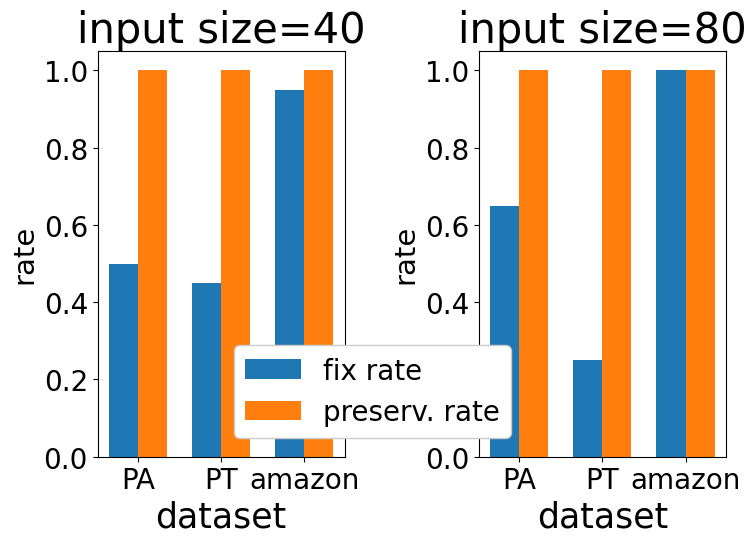

In [93]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract values and labels
table_names1 = df1['table_name']
fix_rate_values1 = df1['fix_rate']
confirm_preserve_rate_values1 = df1['confirm_preserve_rate']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
fix_rate_values2 = df2['fix_rate']
confirm_preserve_rate_values2 = df2['confirm_preserve_rate']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, fix_rate_values1, bar_width, label='fix rate')
axes[0].bar(x1 + bar_width/2, confirm_preserve_rate_values1, bar_width, label='preserv. rate')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, fix_rate_values2, bar_width)
axes[1].bar(x2 + bar_width/2, confirm_preserve_rate_values2, bar_width)

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('rate', fontsize=21)
axes[0].set_title('input size=40')

# axes[0].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('rate', fontsize=21)
axes[1].set_title('input size=80')

# axes[1].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
# fig.suptitle('fix rate + confirm preserve rate', y=0.95)

legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.3))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)


# Add legends for both bars
# axes[0].legend(loc='upper left',bbox_to_anchor=(-0.15, 1.2))
# axes[1].legend(loc='upper right',bbox_to_anchor=(1.15, 1.2))


# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/witan_case_study_fixconfirm.pdf", format="pdf")
plt.show()


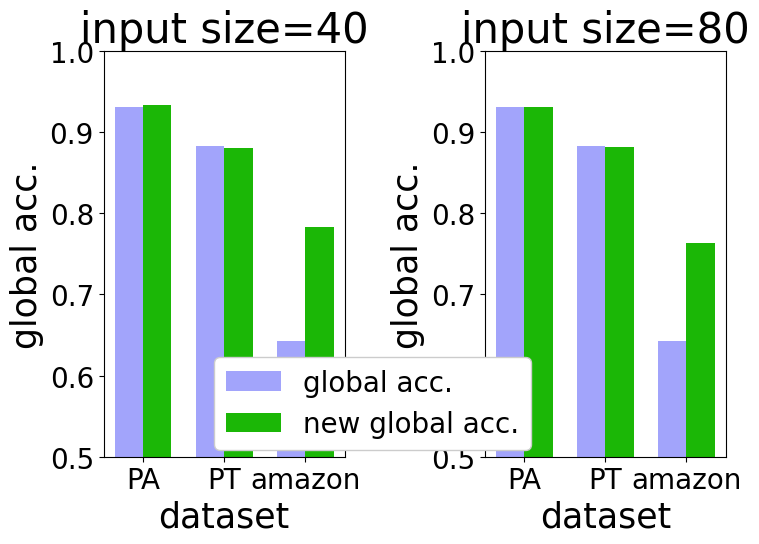

In [90]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract values and labels
table_names1 = df1['table_name']
global_accuracy1 = df1['global_accuracy']
new_global_accuracy1 = df1['new_global_accuracy']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
global_accuracy2 = df2['global_accuracy']
new_global_accuracy2 = df2['new_global_accuracy']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, global_accuracy1, bar_width, label='global acc.', color='#a2a4fb')
axes[0].bar(x1 + bar_width/2, new_global_accuracy1, bar_width, label='new global acc.', color='#1bb706')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, global_accuracy2, bar_width, color='#a2a4fb')
axes[1].bar(x2 + bar_width/2, new_global_accuracy2, bar_width, color='#1bb706')

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('global acc.')
axes[0].set_title('input size=40')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
axes[0].set_ylim([0.5, 1])

# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('global acc.')
axes[1].set_title('input size=80')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
axes[1].set_ylim([0.5, 1])

# axes[1].legend(loc='lower center')
# fig.suptitle('global accuracy',y=0.95)

legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.28))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)

# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/witan_case_study_global.pdf", format="pdf")

plt.show()
